In [13]:
import pandas as pd
import glob
folder = r"F:\Lab\nfs\base\*.csv"

In [43]:
folder = r"F:\Lab\nfs\base-visob\stats\right\Female\*.csv"

all_data = []
for f in glob.glob(folder):
    df = pd.read_csv(f, header=1)
    # print(df.head())
    exp_id = df['Experiment ID'][0]
    exp = exp_id.split('_')[-1]
    auc = df['AUC'][0]
    eer = df['EER'][0]
    zero_fmr = df['ZeroFMR'][0]
    fmr1000 = df['FMR1000'][0]
    fmr100 = df['FMR100'][0]
    fmr10 = df['FMR10'][0]
    fmr20 = df['FMR20'][0]
    exp_id = '_'.join(exp_id.split('_')[:-1])
    all_data.append([exp_id, auc, eer, zero_fmr, fmr10, fmr20, fmr100, fmr1000, exp, 'F100'])
    # all_data[exp].append([exp_id, auc, eer, zero_fmr, fmr10, fmr20, fmr100, fmr1000])
    # all_data.append(list(df.iloc[0]))
# print(all_data)

In [44]:
folder = r"F:\Lab\nfs\base-visob\stats\right\Male\*.csv"
for f in glob.glob(folder):
    df = pd.read_csv(f, header=1)
    # print(df.head())
    exp_id = df['Experiment ID'][0]
    exp = exp_id.split('_')[-1]
    auc = df['AUC'][0]
    eer = df['EER'][0]
    zero_fmr = df['ZeroFMR'][0]
    fmr1000 = df['FMR1000'][0]
    fmr100 = df['FMR100'][0]
    fmr10 = df['FMR10'][0]
    fmr20 = df['FMR20'][0]
    exp_id = '_'.join(exp_id.split('_')[:-1])
    all_data.append([exp_id, auc, eer, zero_fmr, fmr10, fmr20, fmr100, fmr1000, exp, 'M100'])
    # all_data[exp].append([exp_id, auc, eer, zero_fmr, fmr10, fmr20, fmr100, fmr1000])
    # all_data.append(list(df.iloc[0]))
# print(all_data)

In [45]:
folder = r"F:\Lab\nfs\base-visob\stats\right\50-50\*.csv"
for f in glob.glob(folder):
    df = pd.read_csv(f, header=1)
    # print(df.head())
    exp_id = df['Experiment ID'][0]
    exp = exp_id.split('_')[-1]
    auc = df['AUC'][0]
    eer = df['EER'][0]
    zero_fmr = df['ZeroFMR'][0]
    fmr1000 = df['FMR1000'][0]
    fmr100 = df['FMR100'][0]
    fmr10 = df['FMR10'][0]
    fmr20 = df['FMR20'][0]
    exp_id = '_'.join(exp_id.split('_')[:-1])
    all_data.append([exp_id, auc, eer, zero_fmr, fmr10, fmr20, fmr100, fmr1000, exp, 'F50M50'])
    # all_data[exp].append([exp_id, auc, eer, zero_fmr, fmr10, fmr20, fmr100, fmr1000])
    # all_data.append(list(df.iloc[0]))
# print(all_data)

In [21]:
all_data

[]

In [46]:
df = pd.DataFrame(all_data)
# df.head()
df[0] = df[0].apply(lambda x:x.split("_")[0])

# df = df[df[8] == "F75M25"]

df.columns = ["Experiment ID", "AUC", "EER", "ZeroFMR", "FMR10", "FMR20", "FMR100", "FMR1000", "Train Balance", "Test Balance"]

df.head()

,Experiment ID,AUC,EER,ZeroFMR,FMR10,FMR20,FMR100,FMR1000,Train Balance,Test Balance
0,DenseNet121,0.934562,0.1436,0.9820,0.2058,0.3466,0.6320,0.8486,F100,F100
1,DenseNet121,0.963762,0.1014,0.8638,0.1028,0.1848,0.4828,0.8072,F50M50,F100
2,DenseNet121,0.943674,0.1306,0.8472,0.1648,0.2822,0.5562,0.7622,M100,F100
3,EfficientNetB0,0.968071,0.0926,0.9306,0.0878,0.1488,0.4034,0.7376,F100,F100
4,EfficientNetB0,0.976945,0.0766,0.9186,0.0582,0.1202,0.3356,0.7558,F50M50,F100


In [51]:
import plotly.express as px

import plotly.graph_objects as go

# Group by Network, Train Balance, TestBalance
df_ = df[df["Train Balance"] == "M100"]
fig = px.bar(df_, x="Experiment ID", y="EER", color="Test Balance", 
                 title="Wide-Form Input",  barmode='group', log_y=True)
fig.show()


In [52]:
import wandb

run = wandb.init(project='UFPR-Ocular', entity='sreeraj')


import plotly.express as px


my_table = wandb.Table(columns=["Experiment ID", "AUC", "EER", "ZeroFMR", "FMR10", "FMR20", "FMR100", "FMR1000", "DataBalance"], data=df)
run.log({"visob_m100r": fig})

_runtime,6
_timestamp,1634110499
_step,0


_runtime,▁
_timestamp,▁
_step,▁


wandb: wandb version 0.12.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


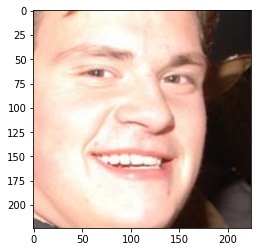

In [2]:
import cv2

img = cv2.imread(r"F:\Lab\datasets\fairface\fairface-img-margin025-trainval\train\1104.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

from matplotlib import pyplot as plt
# img = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
plt.imshow(img)
plt.show()

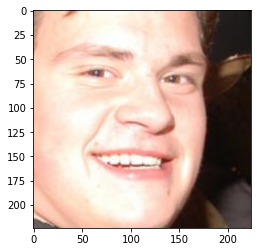

In [3]:
img = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
plt.imshow(img)
plt.show()

In [ ]:
header = list(df.iloc[0])
header[-5:] = list(df.columns)[-5:]


df_new = pd.DataFrame(all_data, columns=header)

df_new.head()
# df_new.to_csv(r"F:\Lab\nfs\base\stats\open_world_f75m25.csv")

In [ ]:
gender_df = pd.read_csv(r"F:\Lab\datasets\UFPR-Periocular\UFPR-Periocular\experimentalProtocol\open_world_valopen\test_fold1.txt", header=None, sep=' ', usecols=[0, 3])
gender_df[0] = gender_df[0].apply(lambda x: x.split('.')[0][:-1] + '.jpg')

gender_df = gender_df[gender_df[3] == 1]
# gender_df[0] = gender_df[0].apply(lambda x: os.path.join(train_dir, x))
gender_df.head()


In [ ]:
gender_df[2] = gender_df[0].apply(lambda x: x[1:5])

In [ ]:
def generate(num=5000):
    res = []
    from random import choice

    # select same
    for i in range(num):
        elem1 = gender_df.sample()
        elem2 = gender_df[gender_df[2] == elem1[2].iloc[0]].sample()
        while elem1[0].iloc[0] == elem2[0].iloc[0]:
            elem2 = gender_df[gender_df[2] == elem1[2].iloc[0]].sample()
        res.append((elem1[0].iloc[0], elem2[0].iloc[0], 0))
    

    for i in range(num):
        elem1 = gender_df.sample()
        elem2 = gender_df[gender_df[2] != elem1[2].iloc[0]].sample()
        res.append((elem1[0].iloc[0], elem2[0].iloc[0], 1))
    return res
df = generate()

df = pd.DataFrame(df)

df.head()

In [ ]:
df[df[0] == df[1]]

In [12]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure(go.Surface(
    x = np.random.random(5) * 0.1,
    y = np.random.random(5) * 5,
    z = [
        [0, 1, 0, 1, 0],
        [1, 0, 1, 0, 1],
        [0, 1, 0, 1, 0],
        [1, 0, 1, 0, 1],
        [0, 1, 0, 1, 0]
    ]))
fig.show()